In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bank = pd.read_csv(r'friance new.csv')
bank.head()

/tmp/ipykernel_6942/1677510859.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  bank = pd.read_csv(r'friance new.csv')


,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
0,2023,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,...,1,0,0,0,1,0.0,0.0,0.0,"9.090.909.090.909.090,00",99.0
1,2024,627.0,33.0,1.0,0.00,2.0,1,1,49503.5,0,...,1,0,0,0,1,2.0,0.0,0.0,"30.303.030.303.030.300,00",33.0
2,1236,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,...,1,0,0,0,1,0.0,0.0,0.0,0.25,400.0
3,1362,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,...,1,0,0,0,1,1.0,"10.229.405.812.711.500,00","17.606.550.452.171.200,00","58.823.529.411.764.700,00",68.0
4,491,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,...,0,0,1,0,1,2.0,0.0,0.0,"15.151.515.151.515.100,00",165.0


In [4]:
bank.shape

(175028, 25)

In [5]:
bank.columns

Index(['Surname', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Surname_tfidf_0', 'Surname_tfidf_1', 'Surname_tfidf_2',
       'Surname_tfidf_3', 'Surname_tfidf_4', 'France', 'Germany', 'Spain',
       'Female', 'Male', 'Mem__no__Products', 'Cred_Bal_Sal', 'Bal_sal',
       'Tenure_Age', 'Age_Tenure_product'],
      dtype='object')

In [6]:
bank_new = bank.drop(columns=['Surname_tfidf_0', 'Surname_tfidf_1', 'Surname_tfidf_2','Surname_tfidf_3', 'Surname_tfidf_4',
                              'Cred_Bal_Sal', 'Bal_sal', 'Tenure_Age', 'Age_Tenure_product'])

In [7]:
bank_new.head()

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male,Mem__no__Products
0,2023,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,1,0,0,0,1,0.0
1,2024,627.0,33.0,1.0,0.00,2.0,1,1,49503.5,0,1,0,0,0,1,2.0
2,1236,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,1,0,0,0,1,0.0
3,1362,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,1,0,0,0,1,1.0
4,491,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,0,0,1,0,1,2.0


In [8]:
bank_new.dtypes

Surname                int64
CreditScore          float64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts        float64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary       object
Exited                 int64
France                 int64
Germany                int64
Spain                  int64
Female                 int64
Male                   int64
Mem__no__Products    float64
dtype: object

In [9]:
bank_new['EstimatedSalary'].head()

0    181449.97
1      49503.5
2    184866.69
3     84560.88
4     15068.83
Name: EstimatedSalary, dtype: object

In [10]:
bank_new.loc[bank_new['EstimatedSalary'] == '38.190.168']

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male,Mem__no__Products
53856,2601,687.0,50.0,6.0,0.0,2.0,0,1,38.190.168,0,1,0,0,0,1,2.0


In [11]:
bank_new['EstimatedSalary'].replace('38.190.168', '381901.68', inplace=True)
bank_new['EstimatedSalary'].replace('14.012.017', '14012.017', inplace=True)

In [12]:
bank_new = bank_new.astype({"CreditScore": 'int64', "Age": 'int64', "Tenure": 'int64', "EstimatedSalary": 'float64'})
bank_new.dtypes

Surname                int64
CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts        float64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
France                 int64
Germany                int64
Spain                  int64
Female                 int64
Male                   int64
Mem__no__Products    float64
dtype: object

In [13]:
bank_new = bank_new.drop(columns=['EstimatedSalary'])

<AxesSubplot: xlabel='Age', ylabel='Count'>

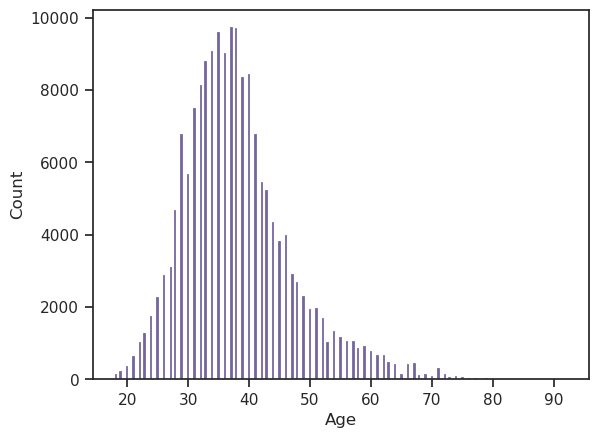

In [14]:
sns.set_theme(style='ticks', palette='viridis')
sns.histplot(data=bank_new, x='Age')

<AxesSubplot: xlabel='CreditScore', ylabel='Count'>

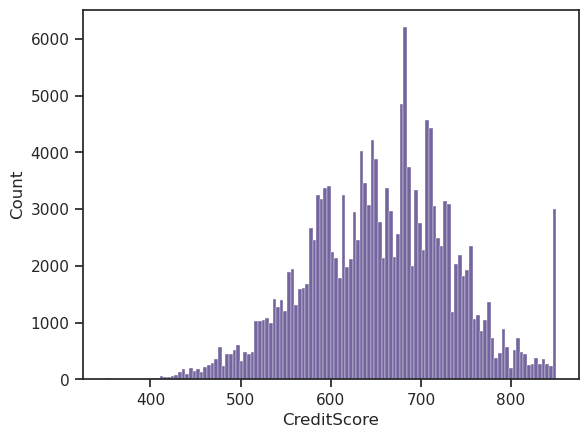

In [15]:
sns.histplot(data=bank_new, x='CreditScore')

<AxesSubplot: xlabel='HasCrCard', ylabel='count'>

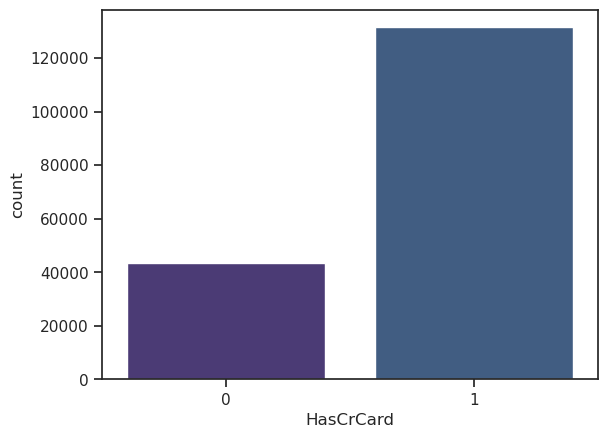

In [16]:
sns.countplot(data=bank_new, x='HasCrCard')


In [17]:
bank_new.head()

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,France,Germany,Spain,Female,Male,Mem__no__Products
0,2023,668,33,3,0.00,2.0,1,0,0,1,0,0,0,1,0.0
1,2024,627,33,1,0.00,2.0,1,1,0,1,0,0,0,1,2.0
2,1236,678,40,10,0.00,2.0,1,0,0,1,0,0,0,1,0.0
3,1362,581,34,2,148882.54,1.0,1,1,0,1,0,0,0,1,1.0
4,491,716,33,5,0.00,2.0,1,1,0,0,0,1,0,1,2.0


In [18]:
bank_numeric = bank_new.select_dtypes(include=['int64', 'float64'])

<AxesSubplot: >

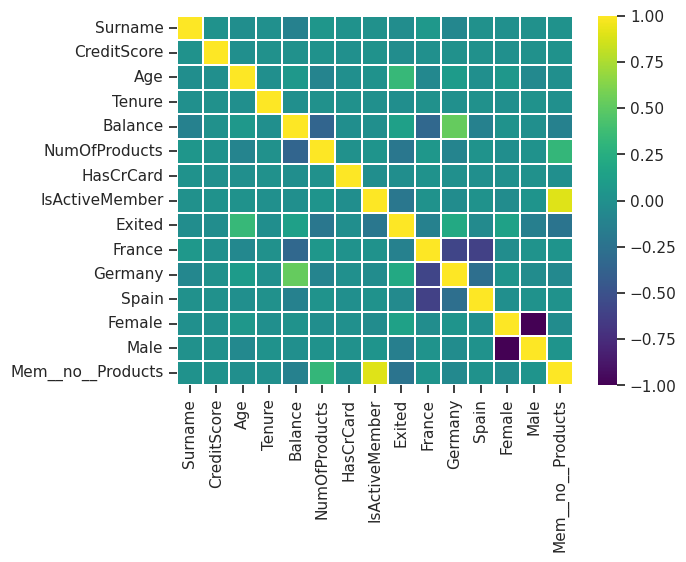

In [48]:
bank_matrix = bank_numeric.corr()

sns.heatmap(bank_matrix, cmap='viridis', linewidth=0.2)